In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv("/Users/divinesam/Desktop/data/BA Project - Data Science/customer_booking.csv", encoding='latin-1')

In [138]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### Exploring for Missing, Null or Values, feature importance and irrelevance

In [139]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [140]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [141]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

## ENCODING CATEGORICAL VARIABLES 

In [142]:
internet_data = df[df['sales_channel']=='Internet']
mobile_data = df[df['sales_channel']=='Mobile']

In [143]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44382 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         44382 non-null  int64  
 1   sales_channel          44382 non-null  object 
 2   trip_type              44382 non-null  object 
 3   purchase_lead          44382 non-null  int64  
 4   length_of_stay         44382 non-null  int64  
 5   flight_hour            44382 non-null  int64  
 6   flight_day             44382 non-null  object 
 7   route                  44382 non-null  object 
 8   booking_origin         44382 non-null  object 
 9   wants_extra_baggage    44382 non-null  int64  
 10  wants_preferred_seat   44382 non-null  int64  
 11  wants_in_flight_meals  44382 non-null  int64  
 12  flight_duration        44382 non-null  float64
 13  booking_complete       44382 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.1+ MB


In [53]:
mobile_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0
45,1,Mobile,RoundTrip,221,61,2,Sun,AKLICN,New Zealand,0,0,0,6.62,0
78,1,Mobile,CircleTrip,281,18,3,Wed,AKLKTM,New Zealand,1,0,0,4.75,0
90,1,Mobile,RoundTrip,63,57,8,Mon,AKLKUL,New Zealand,0,0,0,8.83,0
100,1,Mobile,RoundTrip,57,21,1,Sun,AKLKUL,Malaysia,1,1,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,1,Mobile,RoundTrip,216,6,10,Thu,PENTPE,Taiwan,1,0,0,4.67,0
49957,1,Mobile,RoundTrip,9,6,15,Mon,PENTPE,Malaysia,1,0,0,4.67,0
49958,4,Mobile,RoundTrip,108,6,16,Mon,PENTPE,Malaysia,1,0,1,4.67,0
49971,2,Mobile,RoundTrip,38,6,1,Sat,PENTPE,Malaysia,0,0,1,4.67,1


In [54]:
internet_completed_bookings = df[(df['sales_channel'] == 'Internet') & (df['booking_complete'] == 1)]

In [55]:
num_customers_internet_completed = len(internet_completed_bookings)

In [56]:
num_customers_internet_completed

6869

In [57]:
len(internet_data)

44382

In [58]:
success_ratio_of_internetbookings = (num_customers_internet_completed/len(internet_data))*100

In [59]:
success_ratio_of_internetbookings

15.476995178225405

In [60]:
mobile_completed_bookings = df[(df['sales_channel'] == 'Mobile') & (df['booking_complete'] == 1)]

In [61]:
mobile_completed_bookings

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
109,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,8.83,1
258,1,Mobile,RoundTrip,22,82,10,Fri,AKLKUL,Malaysia,1,1,1,8.83,1
337,2,Mobile,RoundTrip,162,18,4,Thu,AKLKUL,Malaysia,0,0,0,8.83,1
460,1,Mobile,RoundTrip,121,19,10,Tue,AKLKUL,Malaysia,1,0,0,8.83,1
464,1,Mobile,RoundTrip,280,35,2,Sun,AKLKUL,Malaysia,1,1,1,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49819,1,Mobile,RoundTrip,31,6,14,Fri,PENTPE,Malaysia,1,0,1,4.67,1
49860,2,Mobile,RoundTrip,42,6,0,Thu,PENTPE,Malaysia,1,0,0,4.67,1
49867,2,Mobile,RoundTrip,75,6,12,Fri,PENTPE,Malaysia,1,0,1,4.67,1
49931,1,Mobile,RoundTrip,81,6,7,Mon,PENTPE,Malaysia,1,1,0,4.67,1


In [62]:
len(mobile_completed_bookings)

609

In [63]:
len(mobile_data)

5618

In [64]:
success_ratio_of_mobiletbookings = (len(mobile_completed_bookings)/len(mobile_data))*100

In [65]:
success_ratio_of_mobiletbookings

10.840156639373442

In [66]:
encoded_sales_channel = pd.get_dummies(df['sales_channel'],drop_first=True).astype('int')

In [67]:
15.476995178225405 - 10.840156639373442


4.636838538851963

In [68]:
df = pd.concat([df, encoded_sales_channel],axis=1,)

In [69]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,0


In [70]:
trip_type_encoded = pd.get_dummies(df['trip_type'],drop_first=True).astype('int')

In [71]:
trip_type_encoded

,OneWay,RoundTrip
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
49995,0,1
49996,0,1
49997,0,1
49998,0,1


In [72]:
(trip_type_encoded['CircleTrip'] == 1).sum()

KeyError: 'CircleTrip'

In [73]:
(trip_type_encoded['OneWay'] == 1).sum()

387

In [74]:
(trip_type_encoded['RoundTrip'] == 1).sum()

49497

In [75]:
df = pd.concat([df, trip_type_encoded],axis=1,)


In [76]:
df.drop('trip_type',axis=1,inplace=True)

In [77]:
df

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile,OneWay,RoundTrip
0,2,Internet,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,Internet,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,Internet,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,Internet,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,Internet,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49996,1,Internet,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49997,1,Internet,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49998,1,Internet,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,0,0,1


In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
encoder = OrdinalEncoder(categories=[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']])  # Specifying the order of days

In [80]:
df['flight_day_encoded'] = encoder.fit_transform(df[['flight_day']])

In [81]:
print(df['flight_day_encoded'])

0        5.0
1        5.0
2        2.0
3        5.0
4        2.0
        ... 
49995    5.0
49996    6.0
49997    5.0
49998    0.0
49999    3.0
Name: flight_day_encoded, Length: 50000, dtype: float64


In [82]:
df = df.drop('flight_day', axis=1)

In [83]:
df.drop("route",axis=1,inplace=True)

In [84]:
df

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile,OneWay,RoundTrip,flight_day_encoded
0,2,Internet,262,19,7,New Zealand,1,0,0,5.52,0,0,0,1,5.0
1,1,Internet,112,20,3,New Zealand,0,0,0,5.52,0,0,0,1,5.0
2,2,Internet,243,22,17,India,1,1,0,5.52,0,0,0,1,2.0
3,1,Internet,96,31,4,New Zealand,0,0,1,5.52,0,0,0,1,5.0
4,2,Internet,68,22,15,India,1,0,1,5.52,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,Australia,1,0,1,5.62,0,0,0,1,5.0
49996,1,Internet,111,6,4,Australia,0,0,0,5.62,0,0,0,1,6.0
49997,1,Internet,24,6,22,Australia,0,0,1,5.62,0,0,0,1,5.0
49998,1,Internet,15,6,11,Australia,1,0,1,5.62,0,0,0,1,0.0


In [86]:
df

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile,OneWay,RoundTrip,flight_day_encoded
0,2,Internet,262,19,7,New Zealand,1,0,0,5.52,0,0,0,1,5.0
1,1,Internet,112,20,3,New Zealand,0,0,0,5.52,0,0,0,1,5.0
2,2,Internet,243,22,17,India,1,1,0,5.52,0,0,0,1,2.0
3,1,Internet,96,31,4,New Zealand,0,0,1,5.52,0,0,0,1,5.0
4,2,Internet,68,22,15,India,1,0,1,5.52,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,Australia,1,0,1,5.62,0,0,0,1,5.0
49996,1,Internet,111,6,4,Australia,0,0,0,5.62,0,0,0,1,6.0
49997,1,Internet,24,6,22,Australia,0,0,1,5.62,0,0,0,1,5.0
49998,1,Internet,15,6,11,Australia,1,0,1,5.62,0,0,0,1,0.0


In [88]:
df_encoded = pd.get_dummies(df, columns=['booking_origin'], prefix='booking_origin')
df_encoded.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,Internet,262,19,7,1,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
1,1,Internet,112,20,3,0,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
2,2,Internet,243,22,17,1,1,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
3,1,Internet,96,31,4,0,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False
4,2,Internet,68,22,15,1,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False


In [90]:
import dtale

In [97]:
dtale.show(df_encoded)

In [94]:
df_encoded.isnull().sum()

num_passengers                         0
sales_channel                          0
purchase_lead                          0
length_of_stay                         0
flight_hour                            0
                                      ..
booking_origin_United Arab Emirates    0
booking_origin_United Kingdom          0
booking_origin_United States           0
booking_origin_Vanuatu                 0
booking_origin_Vietnam                 0
Length: 118, dtype: int64

In [95]:
df = df_encoded

In [98]:
df_encoded = pd.get_dummies(df, columns=['sales_channel'], prefix='sales_channel',drop_first=True)

In [101]:
df = df_encoded.astype('int')

In [103]:
df.to_csv('Model_data.csv')

## MODEL Implementation: Random Forest Classifier

In [104]:
df = pd.read_csv("Model_Data.csv")
df.head()

,Unnamed: 0,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,sales_channel_Mobile
0,0,2,262,19,7,1,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,112,20,3,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,243,22,17,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,96,31,4,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,68,22,15,1,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# df = df[['purchase_lead','flight_hour','length_of_stay','booking_origin','flight_day_encoded','flight_duration','booking_complete']]
# df = df.drop(['Unnamed: 0','OneWay.1','RoundTrip.1','OneWay','RoundTrip'],axis=1)
df = df.drop('Unnamed: 0',axis=1)

In [106]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile,...,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,sales_channel_Mobile
0,2,262,19,7,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [108]:
X = df.drop("booking_complete", axis=1)  # Features
y = df["booking_complete"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
y_pred = rf.predict(X_test)

### FEATURE IMPORTANCE

In [111]:
feature_importances = rf.feature_importances_
feature_names = X.columns

In [113]:
feature_data = pd.DataFrame({"feature": feature_names, "importance": feature_importances})
feature_data.sort_values("importance", ascending=True, inplace=True)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

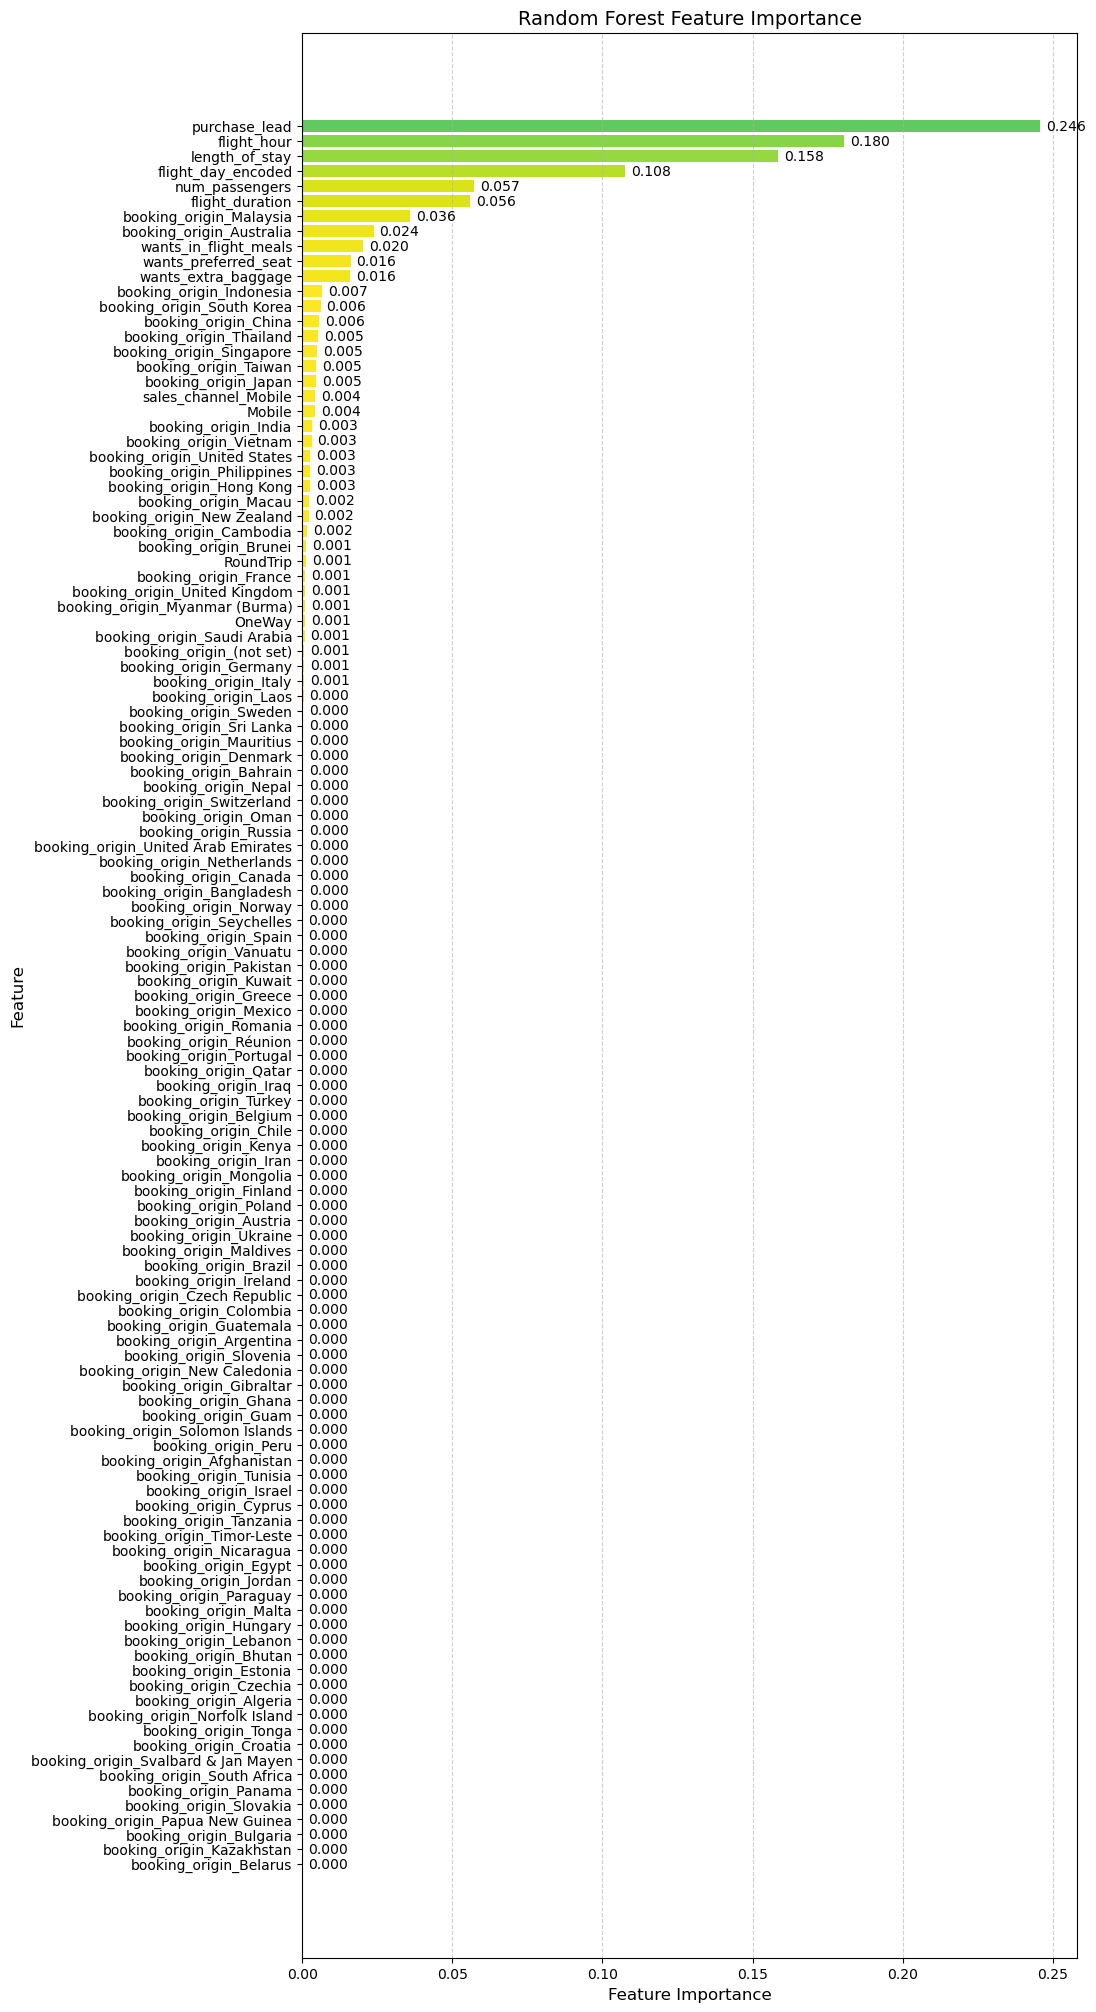

2024-01-24 12:09:13,936 - INFO     - Executing shutdown due to inactivity...
2024-01-24 12:09:13,973 - INFO     - Executing shutdown...
2024-01-24 12:09:13,975 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
2024-01-24 12:12:31,919 - INFO     - Executing shutdown due to inactivity...
2024-01-24 12:12:32,130 - INFO     - Executing shutdown...
2024-01-24 12:12:32,132 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [135]:
plt.figure(figsize=(10, 25))
colors = plt.cm.viridis_r(feature_data["importance"])

bars = plt.barh(feature_data["feature"], feature_data["importance"], color=colors)

for bar, value in zip(bars, feature_data["importance"]):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, f'{value:.3f}', 
             va='center', ha='left', color='black', fontsize=10)

plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Random Forest Feature Importance", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.6)

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical')
cbar.set_label("Importance Score", rotation=270, labelpad=15, fontsize=10)

plt.tight_layout()
plt.show()

## Evaluating Model Performance:

In [127]:
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy*100,'%')
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(rf, X, y, cv=skf, scoring="accuracy")
precision_scores = cross_val_score(rf, X, y, cv=skf, scoring="precision")
recall_scores = cross_val_score(rf, X, y, cv=skf, scoring="recall")
f1_scores = cross_val_score(rf, X, y, cv=skf, scoring="f1")
roc_auc_scores = cross_val_score(rf, X, y, cv=skf, scoring="roc_auc")

In [128]:
accuracy_scores_percentage = accuracy_scores * 100
precision_scores_percentage = precision_scores * 100
recall_scores_percentage = recall_scores * 100
f1_scores_percentage = f1_scores * 100
roc_auc_scores_percentage = roc_auc_scores * 100

In [42]:
print("Accuracy:   Mean: {:.2f}% Std: {:.4f}%".format(accuracy_scores_percentage.mean(), accuracy_scores_percentage.std()))
print("Precision:  Mean: {:.2f}% Std: {:.4f}%".format(precision_scores_percentage.mean(), precision_scores_percentage.std()))
print("Recall:     Mean: {:.2f}% Std: {:.4f}%".format(recall_scores_percentage.mean(), recall_scores_percentage.std()))
print("F1-score:   Mean: {:.2f}% Std: {:.4f}%".format(f1_scores_percentage.mean(), f1_scores_percentage.std()))
print("AUC-ROC:    Mean: {:.2f}% Std: {:.4f}%".format(roc_auc_scores_percentage.mean(), roc_auc_scores_percentage.std()))

Accuracy:   Mean: 85.04% Std: 0.0510%
Precision:  Mean: 49.97% Std: 0.8158%
Recall:     Mean: 10.90% Std: 0.5348%
F1-score:   Mean: 17.89% Std: 0.7047%
AUC-ROC:    Mean: 74.97% Std: 0.6101%


In [129]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract and print all four parameters
tp = cm[0, 0]  # True Positives
tn = cm[1, 1]  # True Negatives
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

True Positives (TP): 8343
True Negatives (TN): 173
False Positives (FP): 177
False Negatives (FN): 1307


In [8]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [10, 50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10, 12],
    "min_samples_leaf": [2, 5, 10, 20],
}

In [10]:
# Perform grid search cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),  # Start with default model
    param_grid=param_grid,
    scoring="f1_macro",  # Focus on F1-score for balanced performance
    cv=5,
)

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 12],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='f1_macro')

In [12]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 10}
Best score: 0.4965749681153434


In [13]:
# Retrain the model with the best hyperparameters
rf_tuned = RandomForestClassifier(**grid_search.best_params_)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=2, n_estimators=10)

In [14]:
# Evaluate the tuned model on the test set
y_pred_tuned = rf_tuned.predict(X_test)

In [15]:
# Calculate evaluation metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)

In [16]:
print("Tuned model results:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)
print("AUC-ROC:", roc_auc_tuned)

Tuned model results:
Accuracy: 0.8537
Precision: 0.5702479338842975
Recall: 0.046621621621621624
F1-score: 0.08619612742036227
AUC-ROC: 0.5202591676183225


In [18]:
# Replace y_pred_tuned with your desired prediction array (original or tuned)
y_pred = y_pred_tuned  # Change this as needed

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract true positives, true negatives, false positives, and false negatives
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

True Positives (TP): 69
True Negatives (TN): 8468
False Positives (FP): 52
False Negatives (FN): 1411
